# **Homework II**
##### Grupo 41
##### Raquel Rodrigues (ist1106322) e Leonor Figueira (ist1106157)

## II. Pogramming

#### Pergunta 1)
#### a.

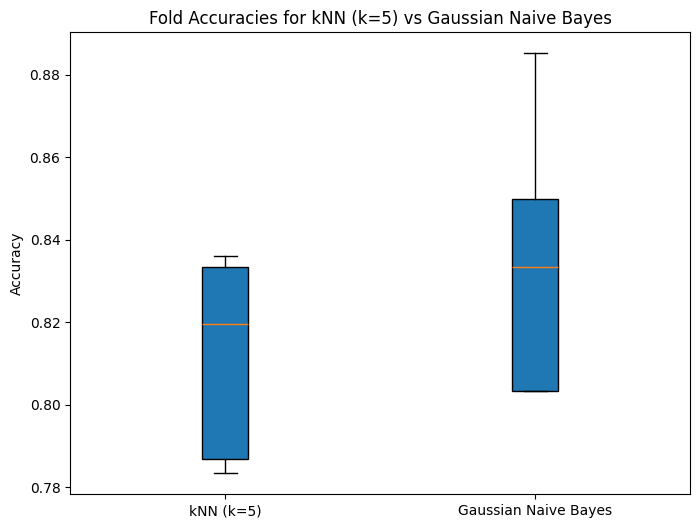

In [3]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Loading the dataset
df = pd.read_csv('heart-disease.csv')

# Separating features from target
X = df.drop(columns='target')
y = df['target']

folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

knn = KNeighborsClassifier(n_neighbors=5)

# Gaussian Naïve Bayes model
nb = GaussianNB()


knn_accuracies = []
nb_accuracies = []

# Perform cross-validation for kNN
for train_k, test_k in folds.split(X, y):
    # Split the data into training and test sets
    X_train, X_test = X.iloc[train_k], X.iloc[test_k]
    y_train, y_test = y.iloc[train_k], y.iloc[test_k]
    
    # Scale the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # 
    knn.fit(X_train_scaled, y_train)
    nb.fit(X_train, y_train)

    knn_accuracy = knn.score(X_test_scaled, y_test)
    knn_accuracies.append(knn_accuracy)

    nb_accuracy = nb.score(X_test, y_test)
    nb_accuracies.append(nb_accuracy)



# kNN model
#knn = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5))
#knn = KNeighborsClassifier(n_neighbors=5)
#knn.fit(X, y)


#nb.fit(X, y)

# Cross-validation for each model
#knn_scores = cross_val_score(knn, X, y, cv=strat_kfold, scoring='accuracy')
#nb_scores = cross_val_score(nb, X, y, cv=strat_kfold, scoring='accuracy')

# Plotting boxplots with the fold accuracies
plt.figure(figsize=(8, 6))
plt.boxplot([knn_accuracies, nb_accuracies], labels=['kNN (k=5)', 'Gaussian Naive Bayes'], patch_artist=True)
plt.title('Fold Accuracies for kNN (k=5) vs Gaussian Naive Bayes')
plt.ylabel('Accuracy')
plt.show()

#### b.

#### c.

#### Pergunta 2)
#### a.

#### b.
...

#### Pergunta 3)
...